In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# <a id='toc1_'></a>[**Déroulé**](#toc0_)

---


_Avançons et allons piocher les infos qui nous intéressent dans les modules ou ailleurs_


**Table of contents**<a id='toc0_'></a>    
- [**Déroulé**](#toc1_)    
- [**Avant-propos** ](#toc2_)    
- [**1 - Quelques bases de python**](#toc3_)    
- [**2 - Commençons maintenant...**](#toc4_)    
  - [📌 **Organisation d'un projet**](#toc4_1_)    
  - [📌 **Importons nos données**](#toc4_2_)    
  - [📌 **Décrivons nos données**](#toc4_3_)    
    - [📌📌 **Séparer en train/test**](#toc4_3_1_)    
    - [📌📌 **Une vue multidimensionnelle**](#toc4_3_2_)    
    - [📌📌 **Données d'entrainement**](#toc4_3_3_)    
    - [📌📌 **Matrice de corrélation**](#toc4_3_4_)    
  - [📌 **Preprocessing**](#toc4_4_)    
  - [📌 **Modélisation**](#toc4_5_)    
    - [📌📌 **Cross validation :** Choisir les bons paramètres du modèle](#toc4_5_1_)    
    - [📌📌 **Modélisation avec le bon modèle**](#toc4_5_2_)    
    - [📌📌 **Evaluation sur les données de test**](#toc4_5_3_)    
  - [📌 **Notion de pipeline**](#toc4_6_)    
  - [📌 **Changeons un peu le modèle**](#toc4_7_)    
  - [📌 **Et si on changeait le seuil de décision**](#toc4_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[**Avant-propos**](avant-propos.ipynb)  [&#8593;](#toc0_)


# <a id='toc3_'></a>[**1 - Quelques bases de python**](#toc0_)

Avant de commencer, il nous faut une idée sur le langage python. Voir [module1-intro](module1-intro.ipynb)


# <a id='toc4_'></a>[**2 - Commençons maintenant...**](#toc0_)


Nous avons la problématique suivante :

Prédiction du risque de score (Voir la description détaillée sur [README](../README.md)). C'un projet de Kaggle (https://www.kaggle.com/competitions/GiveMeSomeCredit/overview)


## <a id='toc4_1_'></a>[📌 **Organisation d'un projet**](#toc0_)


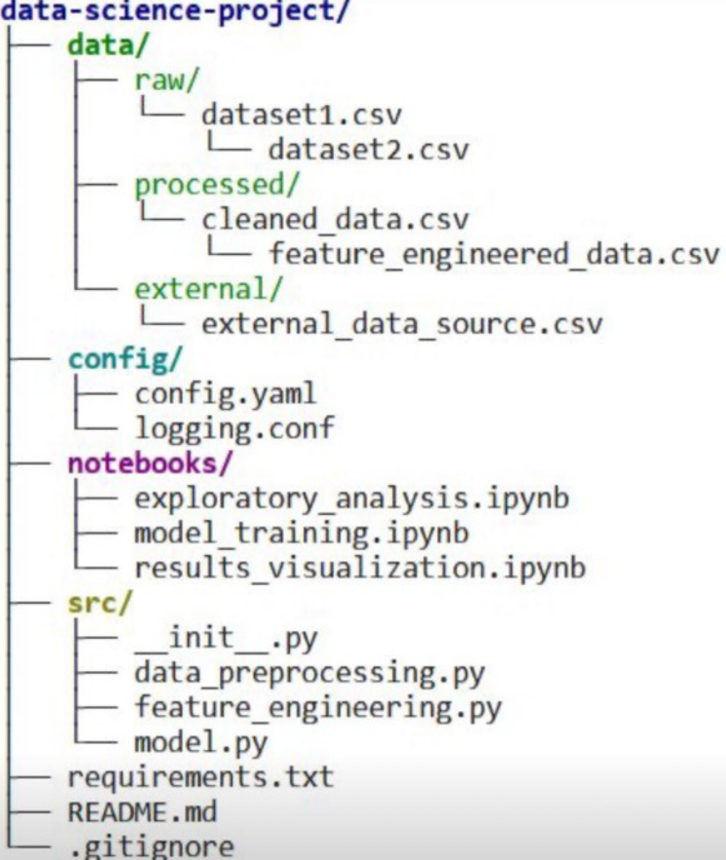
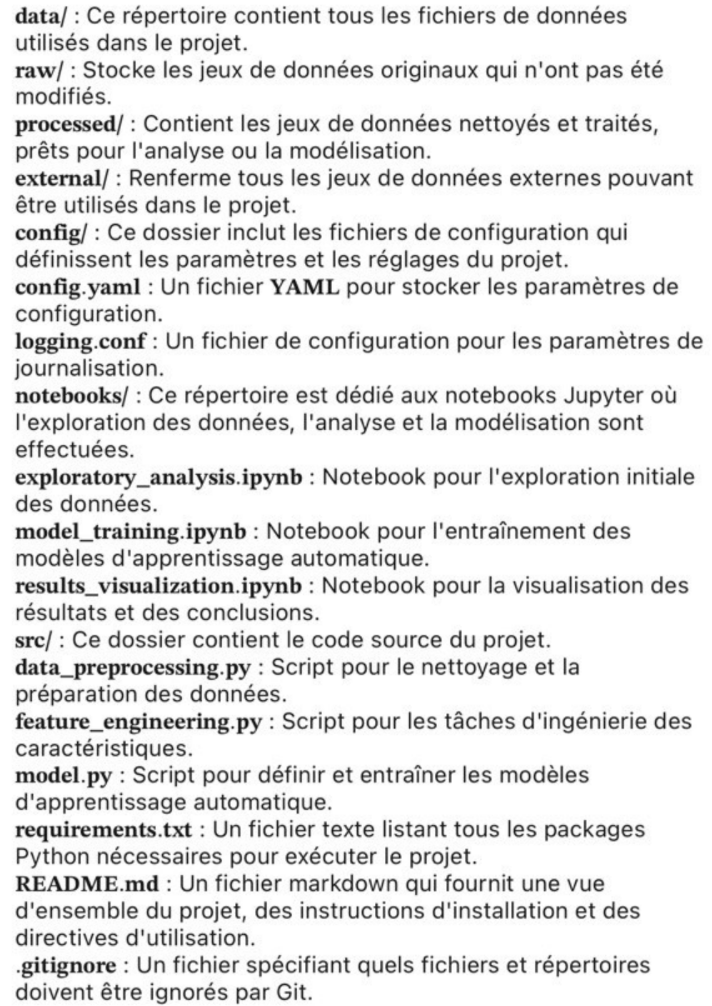

Source : de Georf Harcherole Miguiama (LinkedIn)


Je l'ai fait sur github (https://github.com/AmoussouKokou/cse/tree/main). **Si vous souhaitez, on pourra organiser une séance pour apprendre git, gitlab/github**


## <a id='toc4_2_'></a>[📌 **Importons nos données**](#toc0_)


- ✅[**C'est quoi une base de données ?**](module2-data_manip.ipynb)
- ✅[**Et pandas ?**](module2-data_manip.ipynb)


Maintenons, nous pourrons importer notre table


In [3]:
import os
os.chdir("../")
os.getcwd()

'd:\\Projet\\formation'

In [4]:
import pandas as pd
data = pd.read_csv("data/raw/cs-training.csv").iloc[:, 1:]
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
desc = pd.read_excel("data/raw/Data Dictionary.xls", header=1)
desc

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [6]:
desc_fr = [
    "Personne ayant un retard de paiement de 90 jours ou plus",
    "Solde total des cartes de crédit et des lignes de crédit personnelles, à l'exception des biens immobiliers et des dettes à tempérament telles que les prêts automobiles, divisé par la somme des limites de crédit",
    "Âge de l'emprunteur en années",
    "Nombre de fois où l'emprunteur a été en retard de paiement de 30 à 59 jours, mais pas plus, au cours des deux dernières années",
    "Paiements mensuels des dettes, pensions alimentaires, frais de subsistance divisés par le revenu mensuel brut",
    "Revenu mensuel",
    "Nombre de prêts ouverts (à tempérament comme un prêt automobile ou un prêt hypothécaire) et de lignes de crédit (par exemple, cartes de crédit)",
    "Nombre de fois où l'emprunteur a été en retard de 90 jours ou plus",
    "Nombre de prêts hypothécaires et immobiliers, y compris les lignes de crédit immobilier",
    "Nombre de fois où l'emprunteur a été en retard de 60 à 89 jours, mais pas plus au cours des deux dernières années",
    "Nombre de personnes à charge dans la famille, à l'exclusion de l'emprunteur lui-même (conjoint, enfants, etc.)"
]
# ajouter la variable
desc["desc_fr"] = desc_fr
desc

,Variable Name,Description,Type,desc_fr
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N,Personne ayant un retard de paiement de 90 jou...
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage,Solde total des cartes de crédit et des lignes...
2,age,Age of borrower in years,integer,Âge de l'emprunteur en années
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer,Nombre de fois où l'emprunteur a été en retard...
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage,"Paiements mensuels des dettes, pensions alimen..."
5,MonthlyIncome,Monthly income,real,Revenu mensuel
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer,Nombre de prêts ouverts (à tempérament comme u...
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer,Nombre de fois où l'emprunteur a été en retard...
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer,"Nombre de prêts hypothécaires et immobiliers, ..."
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer,Nombre de fois où l'emprunteur a été en retard...


## <a id='toc4_3_'></a>[📌 **Décrivons nos données**](#toc0_)


In [7]:
data.shape

(150000, 11)

In [8]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### <a id='toc4_3_1_'></a>[📌📌 **Séparer en train/test**](#toc0_)


In [9]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape, y.shape

((150000, 10), (150000,))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((120000, 10), (30000, 10))

In [11]:
train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)

On fera à présent tout avec les données d'entrainement, comme si les données de test n'existaient pas


### <a id='toc4_3_2_'></a>[📌📌 **Une vue multidimensionnelle**](#toc0_)


In [12]:
train.to_csv('data/processed/cse_for_acp.csv', index=False, encoding='utf-8')
if input("y/n")=="y":
    import subprocess
    subprocess.run(["Rscript", "d:/Projet/formation/src/modules/cse_for_acp.R"], check=True)

### <a id='toc4_3_3_'></a>[📌📌 **Données d'entrainement**](#toc0_)


✅ **Notre cible**


In [13]:
y_train.sum()*100/y_train.count()

np.float64(6.684166666666667)

classe minoritaire :

- on peut équilibrer les classes
- ou utiliser des métriques adaptées (on verra ça)

Il faudra peut-être aussi savoir comme sont distribuées chaque variable par rapport à la cible. Mais gérons certains problèmes avec la cible d'abord


✅ **Valeurs manquantes ?**


In [14]:
vm = train.isna().sum().to_frame('n_missing_values')
vm["p_missing_values"] = train.isna().sum().to_frame('n_missing_values')*100/train.shape[0]
vm

,n_missing_values,p_missing_values
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,23675,19.729167
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


**Que faire ?**

- [ ] Questionner le métier
  - ça permet d'approcher les vraies valeurs
- [ ] Supprimer les lignes présentant des données manquantes.
  - Utile si nous n'avons aucune idée sur les valeurs manquantes
- [ ] Ici, c'est plus les revenus qui sont manquants
  - ça, c'est courant
  - Peut être utile d'imputer, mais risque d'inventer les données
  - Plusieurs méthodes d'imputations :
    - Caractéristiques centrales (moyenne, médiane, etc)
    - caractéristiques centrales par groupe
    - Analyse multidimensionnelle
    - Remplacer par une valeur quelconque
    - KNN
    - Etc.
    - Chaque méthode a son avantage et son inconvenient

**_Supprimons les valeurs qui manquent. Mais avant ça, regardons un peu la distribution du revenu_**


✅ **Distribution du revenu**


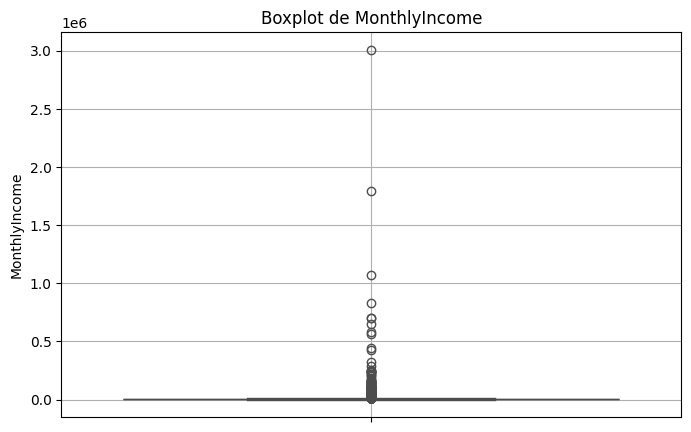

In [15]:
from src.modules.plots import Plots
Plots(train).boxplot("MonthlyIncome")

Distribution écrasée par les valeurs très élevées et des revenus nuls (bizarre).

Possibilité : **S'occuper des catégories séparément** : un modèle pour les revenus intermédiaires. Les autres, nous ne les gérerons pas ici. Mais possible de mettre en place un modèle pour ceux qui ont des revenus 0, ceux qui ont des revenus très élevés et ceux qui ont des revenus manquants.

Nous allons seulement gérer le cas des individus avec un revenu compris entre $]0, 10000]$


✅ **Cas de personnes avec un revenu entre $]0, 10000]$**


on obtient quelque chose de plus agréable, mieux encore, on n'a plus de valeurs manquantes à gérer pour cette population


In [16]:
cutoff = 10000

In [17]:
train_1 = train.loc[(0 < train.MonthlyIncome) & (train.MonthlyIncome < cutoff)]
test_1 = test.loc[(0 < test.MonthlyIncome) & (test.MonthlyIncome < cutoff)]

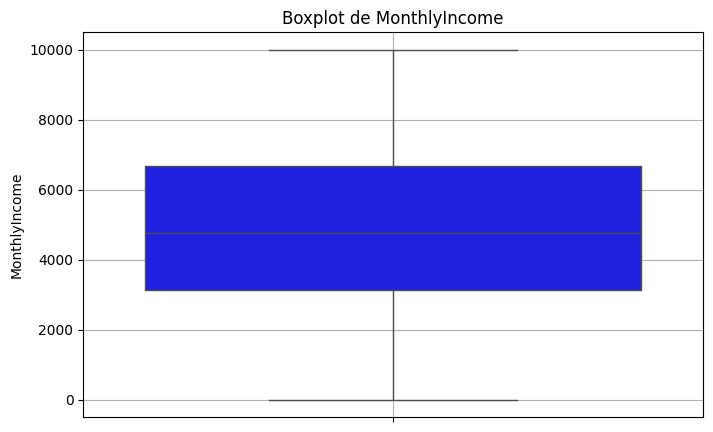

In [18]:
Plots(train_1).boxplot("MonthlyIncome")

In [19]:
train_1.shape, test_1.shape

((79207, 11), (19643, 11))

In [20]:
print(train_1.isna().sum())
print(test_1.isna().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


✅ **Distribution en fonction de la cible**


In [21]:
train_1.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

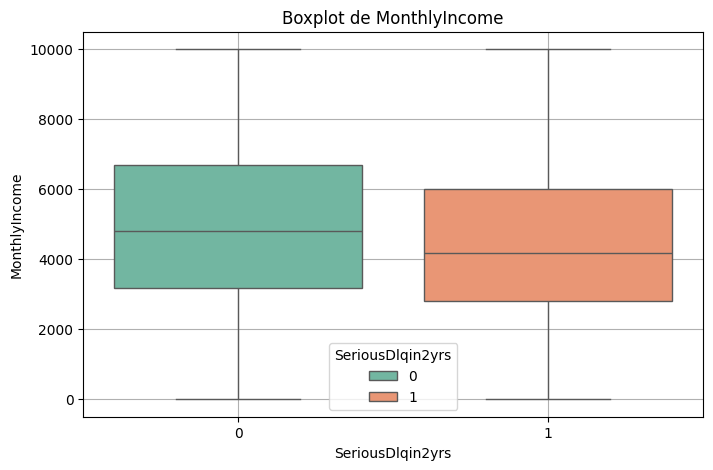

In [22]:
Plots(train_1).boxplot("MonthlyIncome", "SeriousDlqin2yrs")

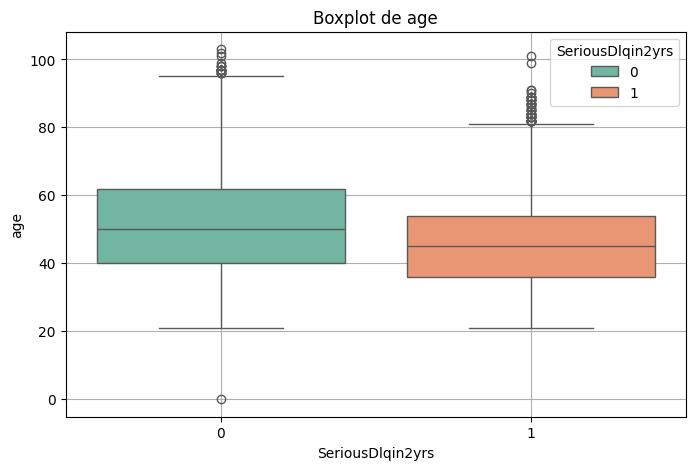

In [23]:
Plots(train_1).boxplot("age", "SeriousDlqin2yrs")

### <a id='toc4_3_4_'></a>[📌📌 **Matrice de corrélation**](#toc0_)

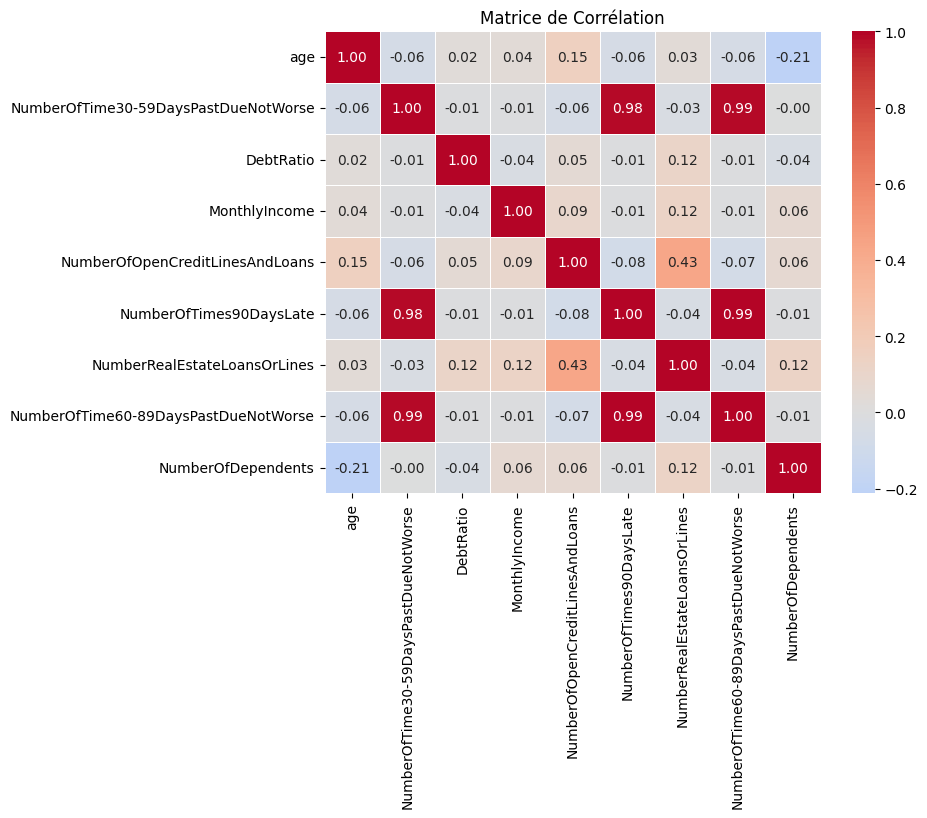

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = X_train.iloc[:,1:].corr()

# Affichage avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, cbar=True)
plt.title("Matrice de Corrélation")
plt.show()

## <a id='toc4_4_'></a>[📌 **Preprocessing**](#toc0_)


In [25]:
corr_matrix.where((abs(corr_matrix) > 0.9) & (corr_matrix < 1)).stack()

NumberOfTime30-59DaysPastDueNotWorse  NumberOfTimes90DaysLate                 0.983642
                                      NumberOfTime60-89DaysPastDueNotWorse    0.986941
NumberOfTimes90DaysLate               NumberOfTime30-59DaysPastDueNotWorse    0.983642
                                      NumberOfTime60-89DaysPastDueNotWorse    0.992823
NumberOfTime60-89DaysPastDueNotWorse  NumberOfTime30-59DaysPastDueNotWorse    0.986941
                                      NumberOfTimes90DaysLate                 0.992823
dtype: float64

In [26]:
y_train_1 = train_1["SeriousDlqin2yrs"]
X_train_1 = train_1.drop(columns=["SeriousDlqin2yrs", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse"])
y_test_1 = test_1["SeriousDlqin2yrs"]
X_test_1 = test_1.drop(columns=["SeriousDlqin2yrs", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse"])

In [27]:
os.getcwd()

'd:\\Projet\\formation'

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from src.modules.transformer.func_transformer import FuncTransformer
from src.modules.transformer.df_column_transformer import DfColumnTransformer

# Identifier les colonnes numériques et catégorielles automatiquement
num_features = X_train_1.select_dtypes(include=["int64", "float64", "bool"]).columns
cat_features = X_train_1.select_dtypes(include=["object", "category"]).columns

# Création du préprocesseur
transformer = DfColumnTransformer(
    ColumnTransformer([
        ("log", FuncTransformer(func=np.log, inverse_func=np.exp), ["MonthlyIncome"])
    ], remainder='passthrough', force_int_remainder_cols=False)
)
scaler = DfColumnTransformer(
    ColumnTransformer([
        ("num", StandardScaler(), num_features),    # Normalisation des variables numériques
    ], remainder='passthrough')
)

In [29]:
X_train_1_prep = transformer.fit_transform(X_train_1)
X_train_1_prep

,MonthlyIncome,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
132895,8.242756,0.008705,73.0,0.0,0.498553,6.0,1.0,0.0
27981,8.220403,0.214501,32.0,0.0,0.211999,8.0,0.0,2.0
103813,8.006368,0.230493,60.0,0.0,1.017328,10.0,1.0,0.0
130975,9.104980,0.075683,58.0,0.0,0.239862,9.0,2.0,1.0
132528,8.853665,0.077708,41.0,0.0,0.324668,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
95676,8.160518,0.470821,30.0,0.0,1.165096,8.0,2.0,0.0
107950,8.865453,1.000000,33.0,1.0,0.117448,4.0,0.0,0.0
18048,8.948326,0.004136,41.0,0.0,0.472323,9.0,2.0,0.0
3895,9.057539,0.000000,49.0,0.0,0.322344,18.0,1.0,1.0


In [30]:
X_train_1_prep = scaler.fit_transform(X_train_1_prep)
X_train_1_prep

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
132895,-0.024742,1.491742,-0.108724,-0.052016,-0.085251,-0.473153,0.078272,-0.712568
27981,-0.023523,-1.257697,-0.108724,-0.054811,-0.110502,-0.071554,-0.922005,1.093264
103813,-0.023428,0.619969,-0.108724,-0.046957,-0.352293,0.330045,0.078272,-0.712568
130975,-0.024345,0.485850,-0.108724,-0.054539,0.888780,0.129246,1.078550,0.190348
132528,-0.024333,-0.654162,-0.108724,-0.053712,0.604877,-1.075551,0.078272,-0.712568
...,...,...,...,...,...,...,...,...
95676,-0.022005,-1.391816,-0.108724,-0.045516,-0.178153,-0.071554,1.078550,-0.712568
107950,-0.018871,-1.190638,0.160855,-0.055733,0.618193,-0.874752,-0.922005,-0.712568
18048,-0.024769,-0.654162,-0.108724,-0.052272,0.711812,0.129246,1.078550,-0.712568
3895,-0.024793,-0.117686,-0.108724,-0.053735,0.835187,1.936441,0.078272,0.190348


**Les données sont prêtes à être utilisées**


## <a id='toc4_5_'></a>[📌 **Modélisation**](#toc0_)


On choisit par exemple de faire de la [régression logistique](https://chatgpt.com/share/67ddf0e5-a868-8001-9762-c3589c779dc2)


### <a id='toc4_5_1_'></a>[📌📌 **Cross validation :** Choisir les bons paramètres du modèle](#toc0_)


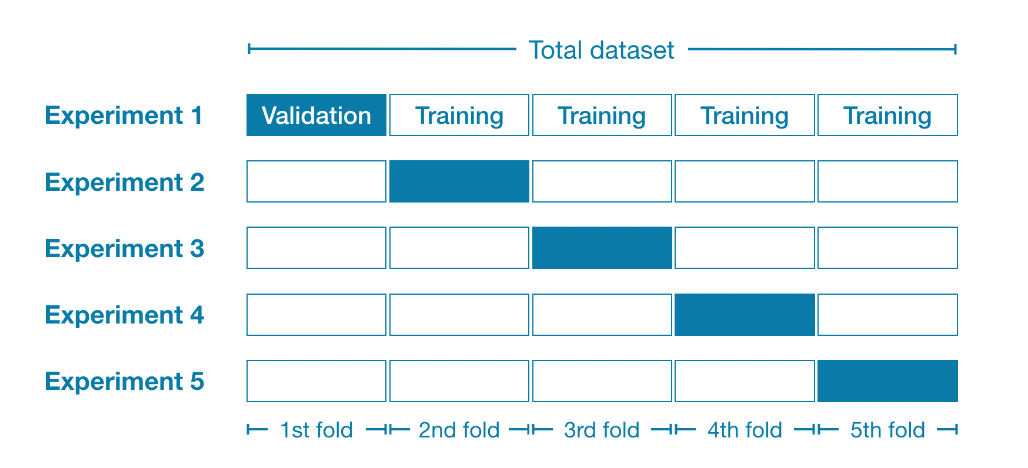

source : https://www.linkedin.com/pulse/cross-validation-crucial-step-towards-robust-machine-learning-nupur-pzaec/


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Définir le modèle de régression logistique
model = LogisticRegression(max_iter=500)

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],        # Paramètre de régularisation
    'solver': ['liblinear', 'lbfgs'],  # Différents solveurs
}

# Définir la stratégie de cross-validation (5-fold stratifié)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utiliser F1-score comme métrique
scorer = make_scorer(f1_score, average='weighted')  # 'weighted' pour multi-classes

# Instancier GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scorer, n_jobs=-1)

In [32]:
# Entraîner le modèle avec GridSearch
grid_search.fit(X_train_1_prep, y_train_1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted))

In [33]:
# Afficher les meilleurs paramètres et la meilleure précision
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure score : {grid_search.best_score_:.2f}")

Meilleurs paramètres : {'C': 0.1, 'solver': 'liblinear'}
Meilleure score : 0.89


In [34]:
# Récupérer les résultats sous forme de DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Afficher les 5 meilleures configurations
cv_results[['param_C', 'param_solver', 'mean_test_score', 'std_test_score']].sort_values(by="mean_test_score", ascending=False)

,param_C,param_solver,mean_test_score,std_test_score
0,0.1,liblinear,0.890357,0.000226
1,0.1,lbfgs,0.890357,0.000226
2,1.0,liblinear,0.890357,0.000226
3,1.0,lbfgs,0.890357,0.000226
4,10.0,liblinear,0.890357,0.000226
5,10.0,lbfgs,0.890357,0.000226
6,100.0,liblinear,0.890357,0.000226
7,100.0,lbfgs,0.890357,0.000226


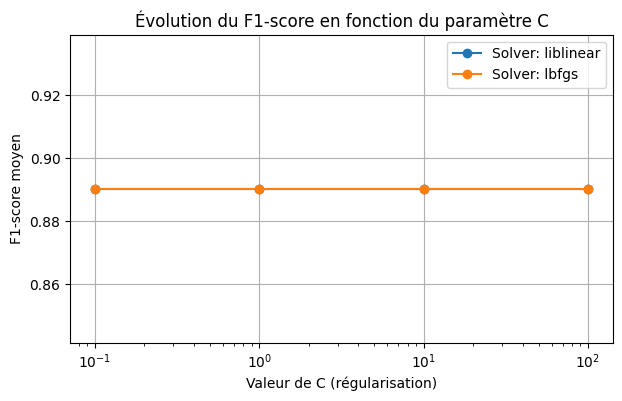

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

# Créer une visualisation des scores en fonction de C
plt.figure(figsize=(7, 4))

for solver in ['liblinear', 'lbfgs']:
    subset = cv_results[cv_results['param_solver'] == solver]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=f'Solver: {solver}')

plt.xscale("log")  # Mettre C sur une échelle logarithmique
plt.xlabel("Valeur de C (régularisation)")
plt.ylabel("F1-score moyen")
plt.title("Évolution du F1-score en fonction du paramètre C")
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc4_5_2_'></a>[📌📌 **Modélisation avec le bon modèle**](#toc0_)


In [36]:
final_model = grid_search.best_estimator_

In [37]:
final_model.fit(X_train_1_prep, y_train_1)

LogisticRegression(C=0.1, max_iter=500, solver='liblinear')

### <a id='toc4_5_3_'></a>[📌📌 **Evaluation sur les données de test**](#toc0_)


In [38]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    roc_curve, auc, classification_report, precision_recall_curve
)

In [39]:
y_pred_1 = final_model.predict(X_test_1)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_test_1.mean()

np.float64(0.07524308914116988)

In [41]:
metrics = {
    "accuracy": accuracy_score(y_test_1, y_pred_1),
    "precision": precision_score(y_test_1, y_pred_1, average="binary"),
    "recall": recall_score(y_test_1, y_pred_1, average="binary"),
    "f1_score": f1_score(y_test_1, y_pred_1, average="binary")
}
metrics

C:\Users\kokou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.9247569108588302,
 'precision': np.float64(0.0),
 'recall': np.float64(0.0),
 'f1_score': np.float64(0.0)}

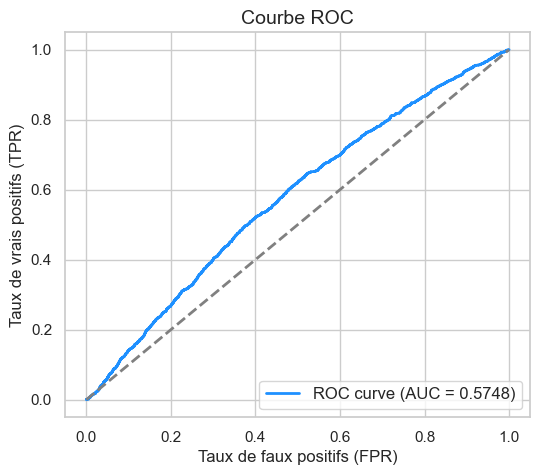

In [42]:
y_proba_1 = final_model.predict_proba(X_test_1)[:, 1]  # Probabilité de la classe positive
fpr, tpr, _ = roc_curve(y_test_1, y_proba_1)
roc_auc = auc(fpr, tpr)

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="dodgerblue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)
plt.xlabel("Taux de faux positifs (FPR)", fontsize=12)
plt.ylabel("Taux de vrais positifs (TPR)", fontsize=12)
plt.title("Courbe ROC", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()

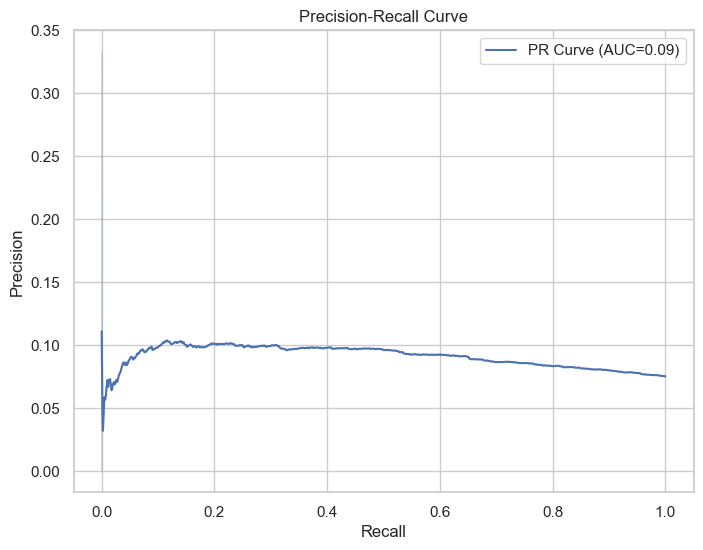

In [43]:
precision, recall, _ = precision_recall_curve(y_test_1, y_proba_1)
pr_auc = auc(recall, precision)

# Création du DataFrame pour Seaborn
import pandas as pd
pr_df = pd.DataFrame({'Recall': recall, 'Precision': precision})

# Affichage avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=pr_df, x="Recall", y="Precision", label=f'PR Curve (AUC={pr_auc:.2f})')

# Personnalisation du graphique
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

C:\Users\kokou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kokou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kokou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

🔹 Accuracy  : 0.9248
🔹 Precision : 0.0000
🔹 Recall    : 0.0000
🔹 F1-score  : 0.0000



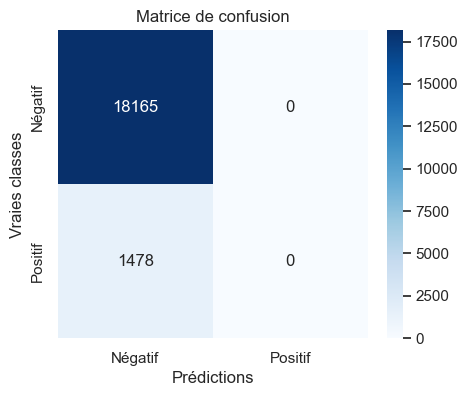

{'accuracy': 0.9247569108588302,
 'precision': np.float64(0.0),
 'recall': np.float64(0.0),
 'f1_score': np.float64(0.0),
 'classification_report': {'0': {'precision': 0.9247569108588302,
   'recall': 1.0,
   'f1-score': 0.9609077443927211,
   'support': 18165.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1478.0},
  'accuracy': 0.9247569108588302,
  'macro avg': {'precision': 0.4623784554294151,
   'recall': 0.5,
   'f1-score': 0.48045387219636054,
   'support': 19643.0},
  'weighted avg': {'precision': 0.8551753441811664,
   'recall': 0.9247569108588302,
   'f1-score': 0.8886060773249391,
   'support': 19643.0}}}

In [44]:
from src.modules.evaluator import Evaluator
Evaluator(modele=final_model).fit().predict(X_test_1, y_test_1)

**Notre modèle est nul. A revoir !!! Mais voici un peu le process**


## <a id='toc4_6_'></a>[📌 **Notion de pipeline**](#toc0_)


Une manière de considérer tout en même temps. On reprend les étapes.


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from src.modules.transformer.func_transformer import FuncTransformer
from src.modules.transformer.df_column_transformer import DfColumnTransformer

# Identifier les colonnes numériques et catégorielles automatiquement
num_features = X_train_1.select_dtypes(include=["int64", "float64", "bool"]).columns
cat_features = X_train_1.select_dtypes(include=["object", "category"]).columns

# Création du préprocesseur
transformer = DfColumnTransformer(
    ColumnTransformer([
        ("log", FuncTransformer(func=np.log, inverse_func=np.exp), ["MonthlyIncome"])
    ], remainder='passthrough', force_int_remainder_cols=False)
)
scaler = DfColumnTransformer(
    ColumnTransformer([
        ("num", StandardScaler(), num_features),    # Normalisation des variables numériques
    ], remainder='passthrough')
)

In [46]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("transformer", transformer),
    ("scaler", scaler),  # Normalisation des données
    ("classifier", LogisticRegression(C=0.1, solver='liblinear'))  # Modèle de régression logistique
])
pipeline

Pipeline(steps=[('transformer',
                 DfColumnTransformer(column_transformer=ColumnTransformer(force_int_remainder_cols=False,
                                                                          remainder='passthrough',
                                                                          transformers=[('log',
                                                                                         FuncTransformer(func=<ufunc 'log'>,
                                                                                                         inverse_func=<ufunc 'exp'>),
                                                                                         ['MonthlyIncome'])]))),
                ('scaler',
                 DfColumnTransformer(column_transformer=ColumnTransformer(remainder='passthrough',
                                                                          transformers=[('num',
                                                                                         StandardScaler(),
                                                                                         Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object'))]))),
                ('classifier', LogisticRegression(C=0.1, solver='liblinear'))])

In [47]:
pipeline.fit(X_train_1, y_train_1)

Pipeline(steps=[('transformer',
                 DfColumnTransformer(column_transformer=ColumnTransformer(force_int_remainder_cols=False,
                                                                          remainder='passthrough',
                                                                          transformers=[('log',
                                                                                         FuncTransformer(func=<ufunc 'log'>,
                                                                                                         inverse_func=<ufunc 'exp'>),
                                                                                         ['MonthlyIncome'])]))),
                ('scaler',
                 DfColumnTransformer(column_transformer=ColumnTransformer(remainder='passthrough',
                                                                          transformers=[('num',
                                                                                         StandardScaler(),
                                                                                         Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object'))]))),
                ('classifier', LogisticRegression(C=0.1, solver='liblinear'))])

In [48]:
y_predict_1 = pipeline.predict(X_test_1)
y_predict_1.mean(), y_test_1.mean()

(np.float64(0.0015272616199154916), np.float64(0.07524308914116988))

🔹 Accuracy  : 0.9250
🔹 Precision : 0.5667
🔹 Recall    : 0.0115
🔹 F1-score  : 0.0225



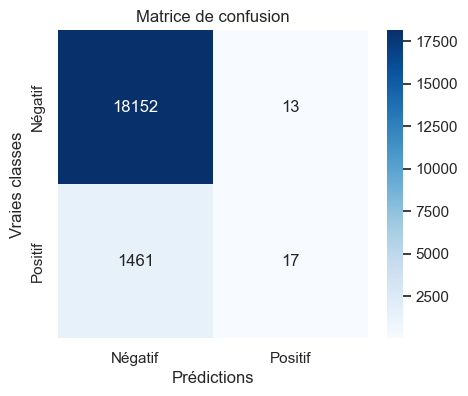

{'accuracy': 0.9249605457414856,
 'precision': np.float64(0.5666666666666667),
 'recall': np.float64(0.011502029769959404),
 'f1_score': np.float64(0.022546419098143235),
 'classification_report': {'0': {'precision': 0.9255085912405038,
   'recall': 0.9992843380126617,
   'f1-score': 0.9609825824553974,
   'support': 18165.0},
  '1': {'precision': 0.5666666666666667,
   'recall': 0.011502029769959404,
   'f1-score': 0.022546419098143235,
   'support': 1478.0},
  'accuracy': 0.9249605457414856,
  'macro avg': {'precision': 0.7460876289535852,
   'recall': 0.5053931838913106,
   'f1-score': 0.4917645007767703,
   'support': 19643.0},
  'weighted avg': {'precision': 0.8985082163222055,
   'recall': 0.9249605457414856,
   'f1-score': 0.8903717465626101,
   'support': 19643.0}}}

In [49]:
from src.modules.evaluator import Evaluator
eval = Evaluator(modele=pipeline).fit()
eval.predict(X_test_1, y_test_1)

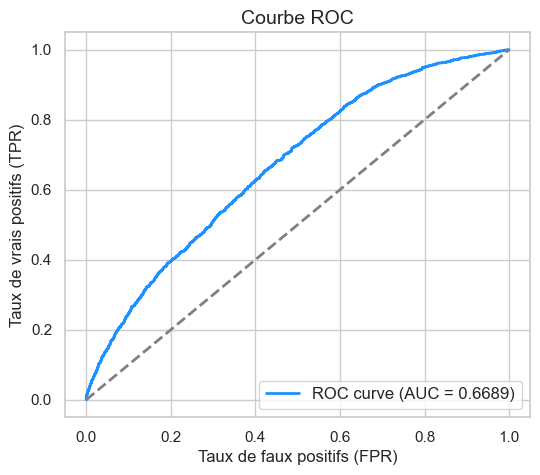

np.float64(0.6688705286490139)

In [50]:
eval.plot_roc_curve(X_test_1, y_test_1)

## <a id='toc4_7_'></a>[📌 **Changeons un peu le modèle**](#toc0_)


0.010181744132769944 0.07524308914116988
🔹 Accuracy  : 0.9250
🔹 Precision : 0.5100
🔹 Recall    : 0.0690
🔹 F1-score  : 0.1216



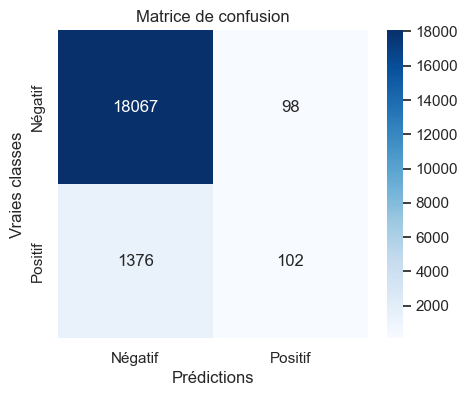

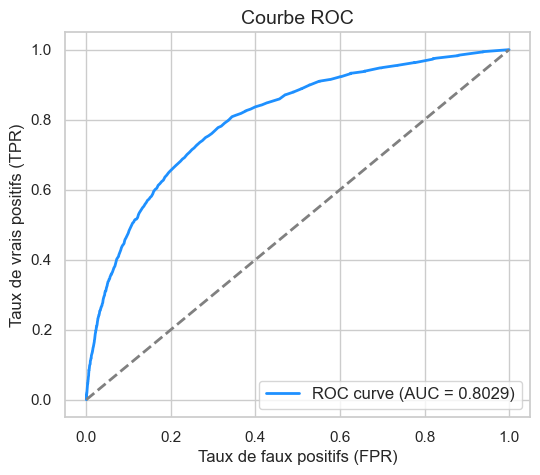

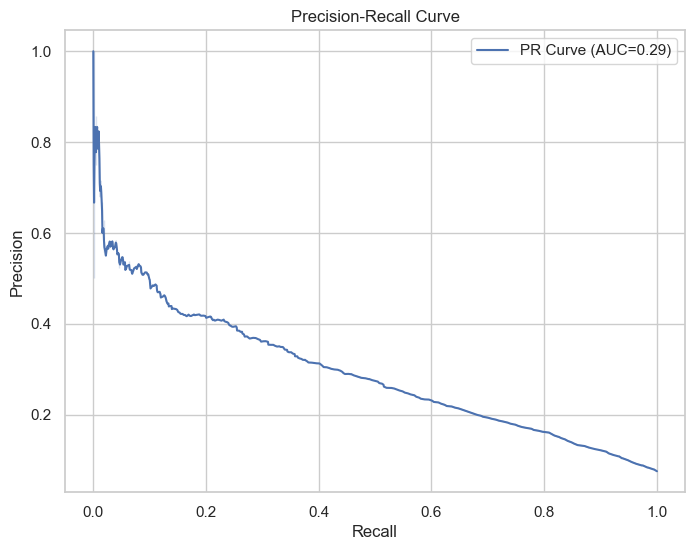

(np.float64(0.8029227085798614), np.float64(0.29084874424163987))

In [51]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("transformer", transformer),
    ("scaler", scaler), 
    ("classifier", RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced"))  # Modèle de régression logistique
])

pipeline.fit(X_train_1, y_train_1)

y_predict_1 = pipeline.predict(X_test_1)
print(y_predict_1.mean(), y_test_1.mean())

eval = Evaluator(modele=pipeline).fit()
eval.predict(X_test_1, y_test_1)

eval.plot_roc_curve(X_test_1, y_test_1), eval.plot_precision_recall_curve(X_test_1, y_test_1)

## <a id='toc4_8_'></a>[📌 **Et si on changeait le seuil de décision**](#toc0_)


0.07015221707478492 0.07524308914116988
🔹 Accuracy  : 0.9037
🔹 Precision : 0.3498
🔹 Recall    : 0.3261
🔹 F1-score  : 0.3375



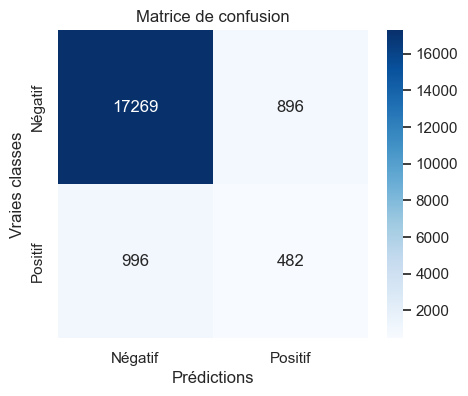

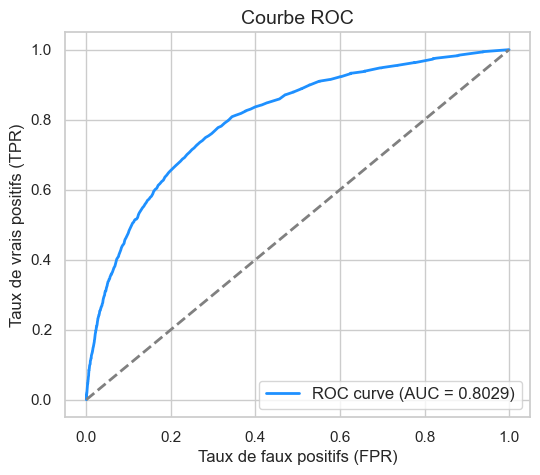

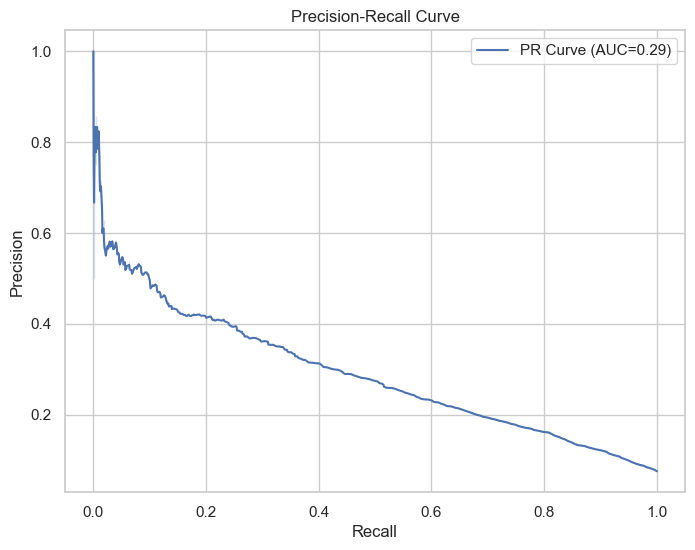

(np.float64(0.8029227085798614), np.float64(0.29084874424163987))

In [52]:
from sklearn.ensemble import RandomForestClassifier
from src.modules.models.threshold_classifier import ThresholdClassifier

pipeline = Pipeline([
    ("transformer", transformer),
    ("scaler", scaler),  # Normalisation des données
    ("classifier", ThresholdClassifier(RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced"), threshold=0.25))
])

pipeline.fit(X_train_1, y_train_1)

y_predict_1 = pipeline.predict(X_test_1)

print(y_predict_1.mean(), y_test_1.mean())

eval = Evaluator(modele=pipeline)
eval.predict(X_test_1, y_test_1)

eval.plot_roc_curve(X_test_1, y_test_1), eval.plot_precision_recall_curve(X_test_1, y_test_1)

## <a id='toc4_8_'></a>[📌 **Mettons en classes les variables entiers**](#toc0_)

In [53]:
X_train_1

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
132895,0.008705,73,0,0.498553,3800.0,6,1,0.0
27981,0.214501,32,0,0.211999,3716.0,8,0,2.0
103813,0.230493,60,0,1.017328,3000.0,10,1,0.0
130975,0.075683,58,0,0.239862,9000.0,9,2,1.0
132528,0.077708,41,0,0.324668,7000.0,3,1,0.0
...,...,...,...,...,...,...,...,...
95676,0.470821,30,0,1.165096,3500.0,8,2,0.0
107950,1.000000,33,1,0.117448,7083.0,4,0,0.0
18048,0.004136,41,0,0.472323,7695.0,9,2,0.0
3895,0.000000,49,0,0.322344,8583.0,18,1,1.0


In [54]:
X_train_1.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
import numpy as np
from src.modules.transformer.func_transformer import FuncTransformer
from src.modules.transformer.df_column_transformer import DfColumnTransformer
from src.modules.transformer.cut_in_class_transformer import CutInClassTransformer

# Identifier les colonnes numériques et catégorielles automatiquement
# num_features = X_train_1.select_dtypes(include=["int64", "float64", "bool"]).columns
# cat_features = X_train_1.select_dtypes(include=["object", "category"]).columns
log_features = ["MonthlyIncome"]
int_features = ["age", "NumberOfOpenCreditLinesAndLoans", "NumberRealEstateLoansOrLines"]
int2_features = ["NumberOfTime30-59DaysPastDueNotWorse"]
int3_features = ["NumberOfDependents"]
float_features = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
cat_features = ["age", "NumberOfOpenCreditLinesAndLoans", "NumberRealEstateLoansOrLines", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfDependents"]
num_features = ["MonthlyIncome", "RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]

# Création du préprocesseur
transformer = DfColumnTransformer(
    ColumnTransformer([
        ("log", FuncTransformer(func=np.log, inverse_func=np.exp), log_features),
        ('int', CutInClassTransformer(bins=4), int_features),
        ('int2', CutInClassTransformer(bins=[0, 1, 100]), int2_features),
        ('int3', CutInClassTransformer(bins=3), int3_features)
    ], remainder='passthrough', force_int_remainder_cols=False)
)
scaler = DfColumnTransformer(
    ColumnTransformer([
        ("float", StandardScaler(), num_features),    # Normalisation des variables numériques
        ("class", OneHotEncoder(dtype=np.int64, drop='first'), cat_features)
    ], remainder='passthrough')
)


In [110]:
transformer.fit_transform(X_train_1)

,MonthlyIncome,age,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines,DebtRatio
132895,8.242756,"[61.0, 103.0[","[5.0, 8.0[","[1.0, 54.0[","[0, 1[","[0.0, 1.0[",0.008705,0.498553
27981,8.220403,"[0.0, 39.0[","[8.0, 11.0[","[0.0, 1.0[","[0, 1[","[1.0, 20.0[",0.214501,0.211999
103813,8.006368,"[50.0, 61.0[","[8.0, 11.0[","[1.0, 54.0[","[0, 1[","[0.0, 1.0[",0.230493,1.017328
130975,9.10498,"[50.0, 61.0[","[8.0, 11.0[","[1.0, 54.0[","[0, 1[","[1.0, 20.0[",0.075683,0.239862
132528,8.853665,"[39.0, 50.0[","[0.0, 5.0[","[1.0, 54.0[","[0, 1[","[0.0, 1.0[",0.077708,0.324668
...,...,...,...,...,...,...,...,...
95676,8.160518,"[0.0, 39.0[","[8.0, 11.0[","[1.0, 54.0[","[0, 1[","[0.0, 1.0[",0.470821,1.165096
107950,8.865453,"[0.0, 39.0[","[0.0, 5.0[","[0.0, 1.0[","[1, 100[","[0.0, 1.0[",1.0,0.117448
18048,8.948326,"[39.0, 50.0[","[8.0, 11.0[","[1.0, 54.0[","[0, 1[","[0.0, 1.0[",0.004136,0.472323
3895,9.057539,"[39.0, 50.0[","[11.0, 58.0[","[1.0, 54.0[","[0, 1[","[1.0, 20.0[",0.0,0.322344


In [111]:
scaler.fit_transform(transformer.fit_transform(X_train_1))

,MonthlyIncome,RevolvingUtilizationOfUnsecuredLines,DebtRatio,"age_[39.0, 50.0[","age_[50.0, 61.0[","age_[61.0, 103.0[","NumberOfOpenCreditLinesAndLoans_[11.0, 58.0[","NumberOfOpenCreditLinesAndLoans_[5.0, 8.0[","NumberOfOpenCreditLinesAndLoans_[8.0, 11.0[","NumberRealEstateLoansOrLines_[1.0, 54.0[","NumberOfTime30-59DaysPastDueNotWorse_[1, 100[","NumberOfDependents_[1.0, 20.0["
132895,-0.085251,-0.024742,-0.052016,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
27981,-0.110502,-0.023523,-0.054811,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
103813,-0.352293,-0.023428,-0.046957,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
130975,0.888780,-0.024345,-0.054539,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
132528,0.604877,-0.024333,-0.053712,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95676,-0.178153,-0.022005,-0.045516,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
107950,0.618193,-0.018871,-0.055733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18048,0.711812,-0.024769,-0.052272,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,0.835187,-0.024793,-0.053735,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


0.07651580715776612 0.07524308914116988
🔹 Accuracy  : 0.8941
🔹 Precision : 0.2994
🔹 Recall    : 0.3045
🔹 F1-score  : 0.3019



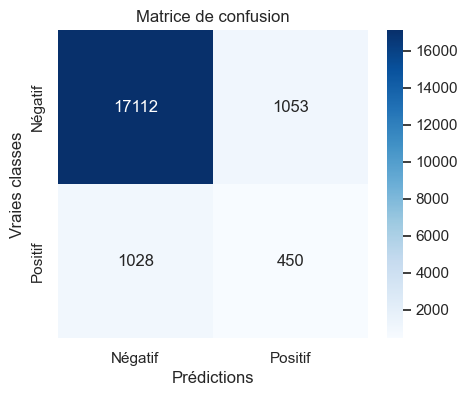

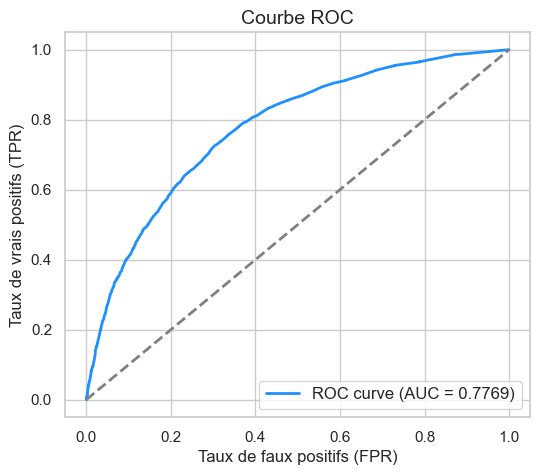

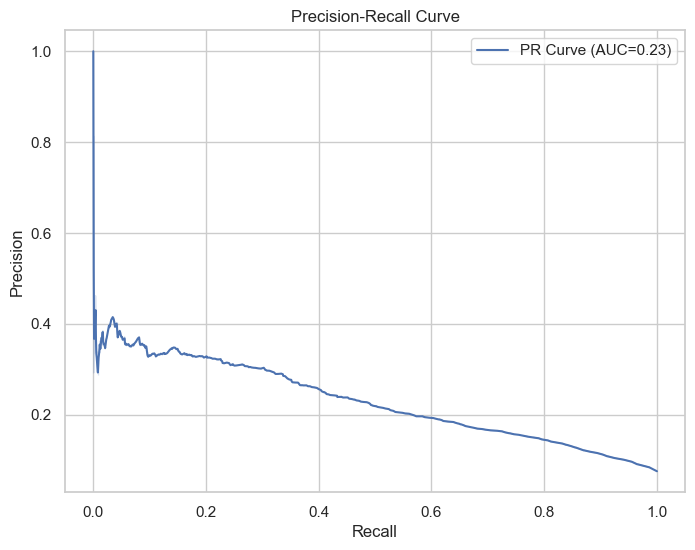

(np.float64(0.7769154685269258), np.float64(0.22930184705048015))

In [113]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("transformer", transformer),
    ("scaler", scaler), 
    ("classifier",  ThresholdClassifier(RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced"), threshold=0.25))
])

pipeline.fit(X_train_1, y_train_1)

y_predict_1 = pipeline.predict(X_test_1)
print(y_predict_1.mean(), y_test_1.mean())

eval = Evaluator(modele=pipeline).fit()
eval.predict(X_test_1, y_test_1)

eval.plot_roc_curve(X_test_1, y_test_1), eval.plot_precision_recall_curve(X_test_1, y_test_1)